### This notebook uses Seaborn to plot a scatterplot using the California housing data

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor


In [125]:
housing_df = pd.read_csv("california-housing(1).csv")
housing_df = housing_df.dropna(axis = "index")
housing_df = housing_df.dropna(axis = "columns")
housing_df = housing_df.drop(columns = ['ocean_proximity'])

Now we plot our Scatter plot with the data

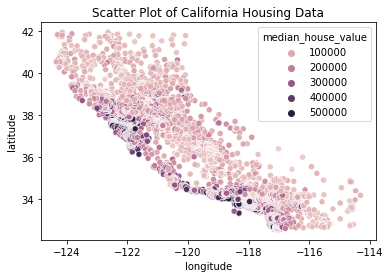

In [126]:
ax = plt.axes()
plot = sns.scatterplot(x = "longitude",
               y = "latitude",
               data = housing_df,
               hue = "median_house_value", ax = ax)
ax.set_title("Scatter Plot of California Housing Data")
plt.savefig("cal-scatterplot-BAD")

## Lets separate the data into feature sets ..

In [127]:
y = housing_df['median_house_value']
x = housing_df.drop(columns=['median_house_value'])

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

Lets build our scaler and predictor now

In [129]:
st_scaler = StandardScaler()

In [130]:
three_neighbors_kregress = KNeighborsRegressor(n_neighbors=3, weights="distance")

In [131]:
three_neighbors_kregress.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [132]:
three_neighbors_kregress.score(x_train, y_train)

1.0

In [133]:
three_neighbors_kregress.score(x_test, y_test)

0.19391394009448049

Now we build the pipeline and test!

In [134]:
my_pipeline = make_pipeline(st_scaler, three_neighbors_kregress)

In [135]:
my_pipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=3, weights='distance'))])

In [136]:
my_pipeline.score(x_train, y_train)

1.0

In [137]:
my_pipeline.score(x_test, y_test)

0.6920737133258696